In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score

# Import the dataset

In [2]:
data = pd.read_csv("dataset.csv")
data.head(3)

,Age,BMI,Blood_Pressure,Cholesterol,Glucose_Level,Heart_Rate,Sleep_Hours,Exercise_Hours,Water_Intake,Stress_Level,...,Diet,MentalHealth,PhysicalActivity,MedicalHistory,Allergies,Diet_Type__Vegan,Diet_Type__Vegetarian,Blood_Group_AB,Blood_Group_B,Blood_Group_O
0,2.0,26.0,111.0,198.0,99.0,72.0,4.0,1.0,5.0,5.0,...,1,2,1,0,1,False,True,True,False,False
1,8.0,24.0,121.0,199.0,103.0,75.0,2.0,1.0,2.0,9.0,...,1,2,1,2,2,False,False,True,False,False
2,81.0,27.0,147.0,203.0,100.0,74.0,10.0,-0.0,5.0,1.0,...,2,0,0,1,0,True,False,False,False,False


In [3]:
#All the datatypes are in integer or float
data.dtypes


Age                      float64
BMI                      float64
Blood_Pressure           float64
Cholesterol              float64
Glucose_Level            float64
Heart_Rate               float64
Sleep_Hours              float64
Exercise_Hours           float64
Water_Intake             float64
Stress_Level             float64
Target                     int64
Smoking                    int64
Alcohol                    int64
Diet                       int64
MentalHealth               int64
PhysicalActivity           int64
MedicalHistory             int64
Allergies                  int64
Diet_Type__Vegan            bool
Diet_Type__Vegetarian       bool
Blood_Group_AB              bool
Blood_Group_B               bool
Blood_Group_O               bool
dtype: object

In [5]:
# check for the null values 
# We see that there is no null values 

data.isnull().sum()

Age                      0
BMI                      0
Blood_Pressure           0
Cholesterol              0
Glucose_Level            0
Heart_Rate               0
Sleep_Hours              0
Exercise_Hours           0
Water_Intake             0
Stress_Level             0
Target                   0
Smoking                  0
Alcohol                  0
Diet                     0
MentalHealth             0
PhysicalActivity         0
MedicalHistory           0
Allergies                0
Diet_Type__Vegan         0
Diet_Type__Vegetarian    0
Blood_Group_AB           0
Blood_Group_B            0
Blood_Group_O            0
dtype: int64

# Split the data in train , validation and test dataset 

In [9]:
X = data.drop('Target', axis=1)
y = data['Target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=30, stratify=y, shuffle=True)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=31,stratify=y_train)

print(len(x_train), len(y_train))
print(len(x_val), len(y_val))
print(len(x_test), len(y_test))
print(len(data))

5729 5729
1910 1910
1910 1910
9549


# Test the model with Decision Tree Classifer

In [13]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier( max_depth=20, min_samples_leaf=15, random_state=39)
dt_model.fit(x_train, y_train)

dt_y_train_pred = dt_model.predict(x_train)
dt_y_val_pred = dt_model.predict(x_val)

dt_f1_score_train = f1_score(y_train, dt_y_train_pred)
dt_f1_score_val = f1_score(y_val, dt_y_val_pred)

print(f"DecisionTree F1 Score for training dataset {dt_f1_score_train}")
print(f"DecisionTree F1 Score for validation dataset {dt_f1_score_val}")

DecisionTree F1 Score for training dataset 0.9190635451505017
DecisionTree F1 Score for validation dataset 0.8969636635141862


# Test the model with Bagging Classifier

In [15]:
from sklearn.ensemble import BaggingClassifier

# the base classifer could be anything like KNNClassifier or Logistic Classifier or DecsisionTree Classifier
dt_base_classifer = DecisionTreeClassifier(max_depth=20, min_samples_leaf=15, random_state=38)

bagging_model = BaggingClassifier(dt_base_classifer, n_estimators=110, random_state=37, n_jobs=-1 )

bagging_model.fit(x_train, y_train)

bag_y_train_pred =  bagging_model.predict(x_train)
bag_y_val_pred = bagging_model.predict(x_val)

bag_train_f1_score = f1_score(y_train, bag_y_train_pred)
bag_val_f1_score = f1_score(y_val, bag_y_val_pred)

print(f"Bagging Classifier with Decision Tree on Training Dataset F1 Score is : {bag_train_f1_score}")

print(f"Bagging Classifier with Decision Tree on Validation Dataset F1 Score is : {bag_val_f1_score}")

Bagging Classifier with Decision Tree on Training Dataset F1 Score is : 0.9390586292320396
Bagging Classifier with Decision Tree on Validation Dataset F1 Score is : 0.9190523198420533


# Test the Model with RandomForest Classifer

Here we have 
n_estimators  to define how many individual decision trees will  built in the forest and this helps to reduce overfitting 
Out_Of_Bag Score : has built in validation in random forest without the validation dataset . 

Each tree is trained on random subset of data with replacement , ie some can be selected multiple times and others not.


In [14]:

rf_model = RandomForestClassifier(max_depth=20, min_samples_leaf=15, random_state=40,n_estimators=70, n_jobs=-1)

rf_model.fit(x_train, y_train)

y_train_pred = rf_model.predict(x_train)
f1_train_pred = f1_score(y_train, y_train_pred)

y_val_pred = rf_model.predict(x_val)
f1_val_pred = f1_score(y_val, y_val_pred)


print(f"Random RainForest F1 score train : { round(f1_train_pred*100, 2) }%")
print(f"Random RainForest F1 score validation : { round(f1_val_pred*100, 2) }%")

Random RainForest F1 score train : 93.45%
Random RainForest F1 score validation : 91.76%


# Lets try with out of box score 
How Can we say OOB score helps to get the n_estimators ? 
Below visualization would helps us

In [17]:
n_estimators_range = range (10,250, 10)

train_scores = []
oobs_scores = []

rf_clf_model = RandomForestClassifier(oob_score=True, random_state=45, n_jobs=-1)

for n_estimator in n_estimators_range:
    rf_clf_model.set_params(n_estimators=n_estimator, max_depth=20, min_samples_leaf=10)
    rf_clf_model.fit(x_train,y_train)

    train_score = rf_clf_model.score(x_train, y_train)
    train_scores.append(train_score)

    oobs_score = rf_clf_model.oob_score_
    oobs_scores.append(oobs_score)

    print(f"{n_estimator:<15} {train_score:<15.4f}  {oobs_score:.4f}")

c:\Users\User\anaconda3\envs\jsv_python\lib\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


10              0.9356           0.8790
20              0.9403           0.8989
30              0.9407           0.9061
40              0.9427           0.9070
50              0.9450           0.9112
60              0.9454           0.9108
70              0.9452           0.9120
80              0.9441           0.9101
90              0.9454           0.9132
100             0.9483           0.9152
110             0.9473           0.9162
120             0.9476           0.9148
130             0.9468           0.9167
140             0.9476           0.9173
150             0.9478           0.9192
160             0.9482           0.9176
170             0.9480           0.9181
180             0.9475           0.9183
190             0.9485           0.9187
200             0.9480           0.9187
210             0.9480           0.9185
220             0.9480           0.9178
230             0.9482           0.9181
240             0.9480           0.9169


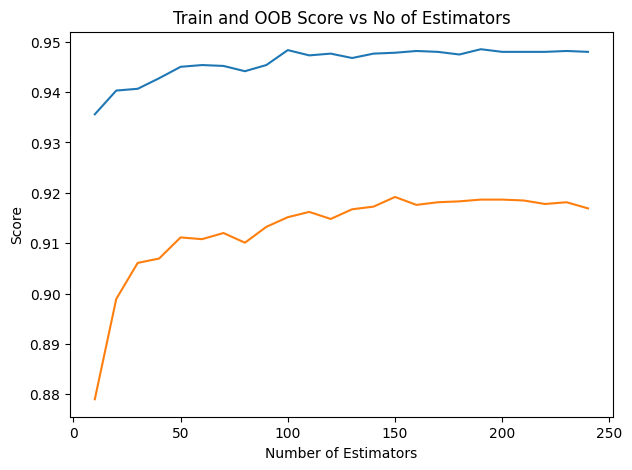

In [19]:
plt.figure(figsize=(7,5))
plt.plot(n_estimators_range, train_scores, label="Train Scores")
plt.plot(n_estimators_range, oobs_scores, label="OOB Score")
plt.xlabel("Number of Estimators")
plt.ylabel("Score")
plt.title("Train and OOB Score vs No of Estimators")
plt.show()

Here we can see when no of estimators is less , the gap between oob score and train score is more,  there is overfitting 
After 90 , we see there is no change , so going with 90 number of estimators should be good. 


# Lets see the performance of Random forest in the test set 

In [22]:
y_test_pred = rf_model.predict(x_test)

test_f1_score = f1_score(y_test, y_test_pred)

print(f"The F1 Score on the testing dataset is { np.round(test_f1_score*100,2)}% ")

The F1 Score on the testing dataset is 91.21% 
